**Examples**

Epidemiology

In [ ]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [ ]:
from modsim import *

Implementing the KM model

In [ ]:
init = State(s=84, i=2, r=2)
show(init)

,state
s,84
i,2
r,2


In [ ]:
init /= init.sum()
show(init)

,state
s,0.954545
i,0.022727
r,0.022727


In [ ]:
tc = 5
tr = 8
beta = 2 / tc
gamma = 2 / tr
def make_system(beta, gamma):
    init = State(s=84, i=2, r=2)
    init /= init.sum()

    return System(init=init, t_end=6*15,
                  beta=beta, gamma=gamma)
system = make_system(beta, gamma)
show(system)

,value
init,s 0.954545 i 0.022727 r 0.022727 Name...
t_end,90
beta,0.4
gamma,0.25


The Update Function

In [ ]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * i + s
    recovered = system.gamma * i
    s += infected
    i -= infected - recovered
    r -= recovered
    return State(s=s, i=i, r=r)
state = update_func(0, init, system)
show(state)

,state
s,1.918182
i,-0.935227
r,0.017045


Running the Simulation

In [ ]:
def run_simulation1(system, update_func):
    state = system.init
    for t in range(2, system.t_end):
        state = update_func(t, state, system)
    return state
final_state = run_simulation1(system, update_func)
show(final_state)

,state
s,-2.507761e+14
i,1.999335e+14
r,5.084262e+13


Collecting the Results

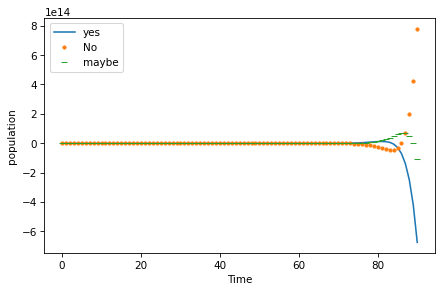

In [ ]:
def run_simulation2(system, update_func):
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    state = system.init
    S[0], I[0], R[0] = state
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        S[t+1], I[t+1], R[t+1] = state.s, state.i, state.r
    return S, I, R
S, I, R = run_simulation2(system, update_func)
def plot_results(S, I, R):
    S.plot(style='-', label='yes')
    I.plot(style='.', label='No')
    R.plot(style='_', label='maybe')
    decorate(xlabel='Time',
             ylabel='population')
plot_results(S, I, R)

Now With a TimeFrame

In [ ]:
def run_simulation(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    return frame
results = run_simulation(system, update_func)
results.head()

,s,i,r
0,0.954545,0.022727,0.022727
1,1.918182,-0.935227,0.017045
2,3.462273,-2.713125,0.250852
3,5.839295,-5.768429,0.929134
4,9.371219,-10.742460,2.371241


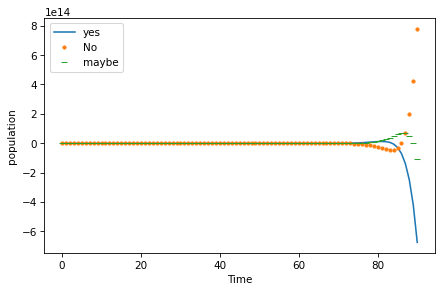

In [ ]:
plot_results(results.s, results.i, results.r)

**Exercises**

Exercise 1

In [16]:
c = 8
r = 6
d = 3 / c
q = 3 / r
system = make_system(d, q)
s = system.init.s
final_state = run_simulation1(system, update_func)
se = final_state.s
s - se
result = run_simulation(system, update_func)
se = result.s[system.t_end]
s - se

2.761694777715329e+18